# Applying Machine Learning
In this assignment, you will explore techniques to evaluate and improve your machine learning models.


## 1 - Packages 

You will need the following packages during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

First, let's try a different method to install a package - run the cell below to install the scikitlearn package. You only need to run this cell once.

In [1]:
!pip install scikit-learn

Let's import all the packages that you will need during this assignment.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from hw8_utils import *

## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [3]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

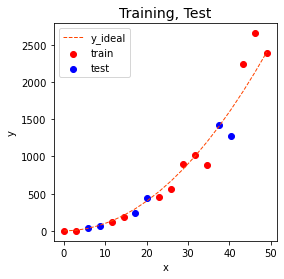

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",    label="train")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [9]:
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ### 
        err += (y[i] - yhat[i]) ** 2
    
    err = (1 / (2 * m)) * err
    
    ### END CODE HERE ### 

    return(err)

In [10]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
err = eval_mse(y_hat, y_tmp)

print(f"Error = {err}")

Error = 0.0050000000000000305


### Expected Output
    Error = 0.0050000000000000305

### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [11]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [12]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

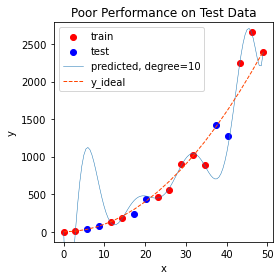

In [13]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [14]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


## 3 - Bias and Variance
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

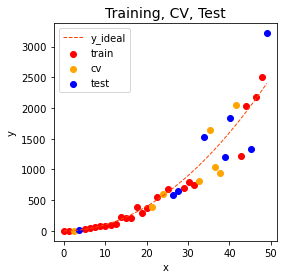

In [15]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = "orange", label="cv")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()

### 3.2 Finding the optimal degree
In our lecture we learned that by increasing the *degree* of the polynomial, we could *create* overfitting. Let's use this knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [16]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

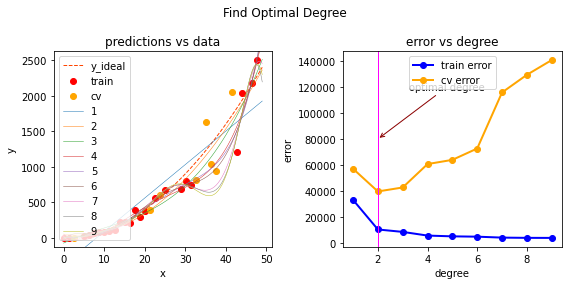

In [17]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

### 3.3 Tuning Regularization.
In previous assignments, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [18]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
  
    
optimal_reg_idx = np.argmin(err_cv) 

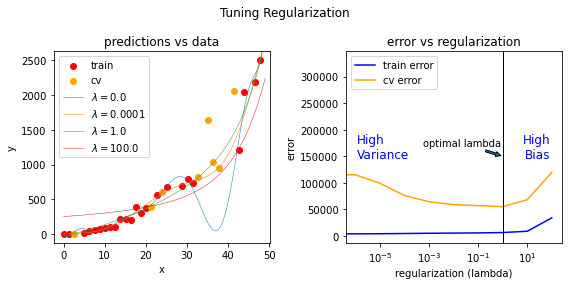

In [19]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

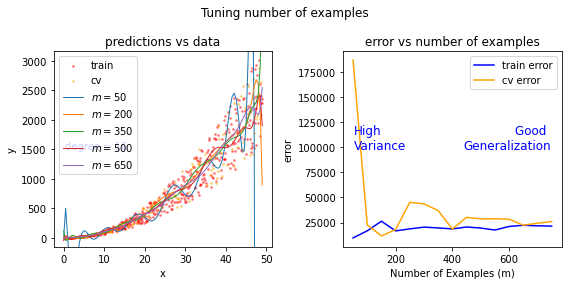

In [20]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [21]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


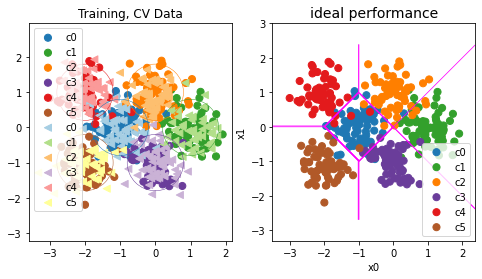

In [22]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [23]:
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
        if(yhat[i] != y[i]):
            incorrect += 1
    
    cerr = (1 / m) * incorrect
    
    ### END CODE HERE ### 
    
    return(cerr)

In [24]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )


categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


### Expected Output
    categorization error 0.333, expected:0.333
    categorization error 0.250, expected:0.250

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [28]:
tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(units=120, activation="relu"),
        tf.keras.layers.Dense(units=40, activation="relu"),
        tf.keras.layers.Dense(units=6, activation="linear")
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
     
    ### END CODE HERE ### 
)

In [29]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 1.0538
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3953
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2559
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2831
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2303
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2379
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2022
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2217
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2148
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 1ms/step - loss: 0.1541
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1474
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1569
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1471
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1389
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1497
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1416
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1401
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1322
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1271
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1089
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1356
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1190
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0979
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1242
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1328
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1076
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1011
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0933
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1040
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0880
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0859
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0748
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0944
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0722
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0650
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0638
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0946
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1021
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1419
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0944
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1370
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0972
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0944
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0356
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0364
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0324
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0420
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 593/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0376
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1244
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1285
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1352
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0495
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 995/1000
13/1

In [30]:
model.summary()


Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               360       
                                                                 
 dense_4 (Dense)             (None, 40)                4840      
                                                                 
 dense_5 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


1082/1082 [==============================] - 1s 778us/step


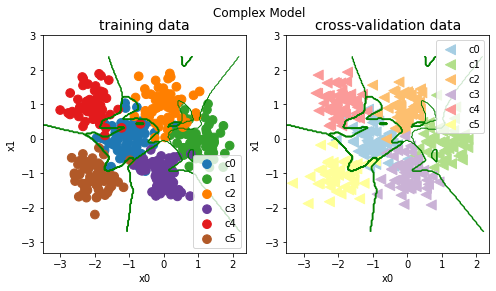

In [31]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [32]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 997us/step
categorization error, training, complex model: 0.007
categorization error, cv,       complex model: 0.116


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [33]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(units=6, activation="relu"),
        tf.keras.layers.Dense(units=6, activation="linear")
        
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    
    ### START CODE HERE ### 
)


In [34]:
model_s.fit(
    X_train,y_train,
    epochs=1000
)


Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.9410
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.5680
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.3374
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.1294
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9435
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7862
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6664
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5745
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5099
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4631
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4271
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1976
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1987
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1982
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1948
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1940
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1940
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1925
Epoch 108/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1933
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1947
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1939
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1932
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1907
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1878
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1878
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1854
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1867
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1871
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1861
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1890
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1861
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1898
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1857
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1877
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1869
Epoch 298/1000
13/13 [==============================] - 0s 916us/step - loss: 0.1827
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1836
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1840
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1837
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1883
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1882
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1841
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1815
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1824
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1836
Epoch 309/1000
13

13/13 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1819
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1853
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1810
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1804
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1790
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1780
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1800
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1774
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1771
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1772
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1821
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1760
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1779
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1776
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1772
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1809
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1773
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1767
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 505/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1767
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1749
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1778
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1758
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1777
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1757
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1739
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1788
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1754
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 603/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1738
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1744
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1753
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1747
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1748
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1730
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1740
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1746
Epoch 697/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1745
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1737
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1762
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1753
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1709
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1715
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1746
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1705
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1715
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1750
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1796
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1697
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1756
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1733
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1735
Epoch 799/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1711
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1681
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1737
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1722
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1705
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1739
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1710
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1717
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1709
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1719
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1708
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1708
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1740
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1686
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1683
Epoch 986/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1712
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1711
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1724
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1714
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1705
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1687
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1686
Epoch 995/1000
13/1

In [35]:

model_s.summary()


Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 18        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


1082/1082 [==============================] - 1s 827us/step


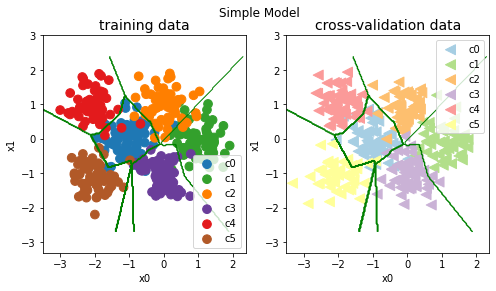

In [36]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [37]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 1ms/step
categorization error, training, simple model, 0.060, complex model: 0.007
categorization error, cv,       simple model, 0.088, complex model: 0.116


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [38]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(units=120, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units=6, activation="linear")
        
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    
    ### START CODE HERE ### 
)


In [39]:
model_r.fit(
    X_train, y_train,
    epochs=1000
)


Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.3624
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5690
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.2347
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0162
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9549
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9523
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8945
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8530
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7957
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7557
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7421
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7406
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 1ms/step - loss: 0.5285
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4959
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4851
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4754
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5260
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4956
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4758
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4746
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4671
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4635
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4673
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4602
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4111
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4113
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4338
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4074
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4117
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4659
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4384
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4192
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4287
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4437
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4190
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3868
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3973
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3979
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4306
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3981
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3939
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3869
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3769
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3783
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3888
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3919
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3930
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3856
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3800
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3884
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3776
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3755
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3753
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3570
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3607
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3568
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3597
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3540
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3558
Epoch 407/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3488
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3520
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3498
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3731
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3965
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3485
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3415
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3640
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3555
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3611
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3898
Epoch 504/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3644
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3421
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3391
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3401
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4144
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3917
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3400
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3374
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3505
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3325
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3428
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3887
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3724
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3453
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3515
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3391
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3457
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3368
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3348
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3312
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3469
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3284
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3345
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3388
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3785
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3563
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3606
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3593
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3753
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3442
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3396
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3325
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3374
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3285
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3635
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3277
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3271
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3375
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3406
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3905
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3513
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3155
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3303
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3499
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3490
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3548
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3201
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3351
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3387
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3420
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3254
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 995/1000
13/1

In [40]:
model_r.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 120)               360       
                                                                 
 dense_9 (Dense)             (None, 40)                4840      
                                                                 
 dense_10 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


1082/1082 [==============================] - 1s 848us/step


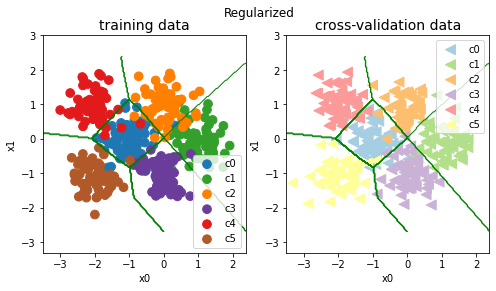

In [41]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [42]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 1ms/step
categorization error, training, regularized: 0.058, simple model, 0.060, complex model: 0.007
categorization error, cv,       regularized: 0.069, simple model, 0.088, complex model: 0.116


The regularized model is a bit better than the simple model in both the trainning set and the cross validation set.

## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. 

In [43]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(units=120, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units=6, activation="linear")
        
        ### START CODE HERE ### 
        ]
    )
    models[i].compile(
        ### START CODE HERE ### 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
        
        ### START CODE HERE ### 
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.4272
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6608
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3194
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0685
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9934
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9482
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9360
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8848
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8224
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7762
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7650
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7632
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.4840
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4737
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4720
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4668
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5028
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4542
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4657
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4815
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4634
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4581
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4598
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4564
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4122
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4112
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4312
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4031
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4108
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4126
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4664
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4383
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4238
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4337
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4461
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4207
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3998
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4145
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4118
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4415
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4077
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4020
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4026
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3818
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3795
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3958
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3939
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3966
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3962
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3900
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4017
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3897
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3917
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3862
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3661
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3698
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3669
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3634
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3608
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3648
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3572
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3732
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4078
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3608
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3457
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3646
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3705
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3902
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3786
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3493
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3471
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3431
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4239
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4072
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3604
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3430
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3581
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3388
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3459
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3704
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3518
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3546
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3529
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3500
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3423
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3348
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3540
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3398
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3428
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3418
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3543
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3490
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3717
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3505
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3499
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3296
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3444
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3369
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3698
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3354
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3372
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3471
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3562
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3908
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3578
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3173
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3317
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3453
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3489
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3391
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3316
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3544
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3294
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3289
Epoch 995/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4883
Epoch 83/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4748
Epoch 84/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4628
Epoch 85/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4712
Epoch 86/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4715
Epoch 87/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4938
Epoch 88/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4806
Epoch 89/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4755
Epoch 90/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4646
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4694
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4691
Epoch 93/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4542
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.4363
Epoch 182/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4251
Epoch 183/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4128
Epoch 184/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4064
Epoch 185/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4064
Epoch 186/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4094
Epoch 187/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4148
Epoch 188/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4168
Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3992
Epoch 190/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3990
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4131
Epoch 192/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4169
Epoch 193/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4027
Epoch 280/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3917
Epoch 281/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 282/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3808
Epoch 283/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 284/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3895
Epoch 285/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4115
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3903
Epoch 287/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3891
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3864
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3768
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3875
Epoch 291/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 378/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3756
Epoch 379/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3807
Epoch 380/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3809
Epoch 381/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4099
Epoch 382/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3717
Epoch 383/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 384/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3610
Epoch 385/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3686
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3567
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3737
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3738
Epoch 389/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3701
Epoch 476/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3629
Epoch 477/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3872
Epoch 478/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 479/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3533
Epoch 480/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3592
Epoch 481/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3517
Epoch 482/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3731
Epoch 483/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3744
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3682
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3509
Epoch 487/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3414
Epoch 574/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3547
Epoch 575/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3393
Epoch 576/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3333
Epoch 577/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 578/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4166
Epoch 579/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3537
Epoch 580/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 581/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 585/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3449
Epoch 672/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3723
Epoch 673/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3986
Epoch 674/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3995
Epoch 675/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 676/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 677/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3308
Epoch 678/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3269
Epoch 679/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3338
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3469
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3332
Epoch 683/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3379
Epoch 770/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 771/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3397
Epoch 772/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3397
Epoch 773/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3745
Epoch 774/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3629
Epoch 775/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3291
Epoch 776/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3806
Epoch 777/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 778/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3231
Epoch 779/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3276
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3386
Epoch 781/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3294
Epoch 868/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3328
Epoch 869/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3390
Epoch 870/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3583
Epoch 871/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3603
Epoch 872/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 873/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3342
Epoch 874/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 875/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3343
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3330
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3511
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 879/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 966/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 967/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3248
Epoch 968/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3289
Epoch 969/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3743
Epoch 970/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 971/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3355
Epoch 972/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3144
Epoch 973/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3197
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3395
Epoch 976/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3311
Epoch 977/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5257
Epoch 65/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5031
Epoch 66/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4943
Epoch 67/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4962
Epoch 68/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4966
Epoch 69/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4917
Epoch 70/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4947
Epoch 71/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4855
Epoch 72/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4819
Epoch 73/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4866
Epoch 74/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5022
Epoch 75/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4970
Epoch 76/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.4118
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4310
Epoch 165/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4550
Epoch 166/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4628
Epoch 167/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4771
Epoch 168/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4564
Epoch 169/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4353
Epoch 170/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4370
Epoch 171/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4241
Epoch 172/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4237
Epoch 173/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4338
Epoch 174/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4391
Epoch 175/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4006
Epoch 262/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4697
Epoch 263/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4441
Epoch 264/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4021
Epoch 265/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3978
Epoch 266/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4186
Epoch 267/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4322
Epoch 268/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4189
Epoch 269/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3861
Epoch 270/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3761
Epoch 271/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3915
Epoch 272/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3922
Epoch 273/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3963
Epoch 360/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4020
Epoch 361/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4182
Epoch 362/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4724
Epoch 363/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4139
Epoch 364/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3742
Epoch 365/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3700
Epoch 366/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3651
Epoch 367/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3703
Epoch 368/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3901
Epoch 369/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4044
Epoch 370/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3757
Epoch 371/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3547
Epoch 458/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3816
Epoch 459/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3634
Epoch 460/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3643
Epoch 461/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3668
Epoch 462/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3505
Epoch 463/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 464/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3720
Epoch 465/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 466/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3749
Epoch 467/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3712
Epoch 468/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4021
Epoch 469/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3867
Epoch 556/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3883
Epoch 557/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3692
Epoch 558/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3528
Epoch 559/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 560/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3476
Epoch 561/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3398
Epoch 562/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 563/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3525
Epoch 564/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3621
Epoch 565/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 566/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3586
Epoch 567/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3466
Epoch 654/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3559
Epoch 655/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3416
Epoch 656/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 657/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 658/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3469
Epoch 659/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3527
Epoch 660/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3655
Epoch 661/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3391
Epoch 662/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3543
Epoch 663/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3862
Epoch 664/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3585
Epoch 665/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3573
Epoch 752/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3964
Epoch 753/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3910
Epoch 754/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 755/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 756/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3457
Epoch 757/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3594
Epoch 758/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3629
Epoch 759/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3292
Epoch 760/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 761/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3585
Epoch 762/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3439
Epoch 763/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3192
Epoch 850/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3360
Epoch 851/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3320
Epoch 852/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3470
Epoch 853/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3551
Epoch 854/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3356
Epoch 855/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3365
Epoch 856/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3319
Epoch 857/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3415
Epoch 858/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3729
Epoch 859/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3679
Epoch 860/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 861/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3317
Epoch 948/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3312
Epoch 949/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3203
Epoch 950/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3128
Epoch 951/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3099
Epoch 952/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3346
Epoch 953/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3371
Epoch 954/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3615
Epoch 955/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 956/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3426
Epoch 957/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3271
Epoch 958/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3362
Epoch 959/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5716
Epoch 47/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5373
Epoch 48/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5675
Epoch 49/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5501
Epoch 50/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5308
Epoch 51/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5367
Epoch 52/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5257
Epoch 53/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5243
Epoch 54/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5087
Epoch 55/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5609
Epoch 56/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5058
Epoch 57/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5124
Epoch 58/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.4273
Epoch 146/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4226
Epoch 147/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4694
Epoch 148/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4483
Epoch 149/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 150/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4244
Epoch 151/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 152/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4212
Epoch 153/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4340
Epoch 154/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4240
Epoch 155/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4321
Epoch 156/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4272
Epoch 157/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3900
Epoch 244/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4015
Epoch 245/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4031
Epoch 246/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4099
Epoch 247/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 248/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3867
Epoch 249/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3959
Epoch 250/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3906
Epoch 251/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4122
Epoch 252/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3995
Epoch 253/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3918
Epoch 254/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4069
Epoch 255/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3771
Epoch 342/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 343/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3649
Epoch 344/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3592
Epoch 345/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3570
Epoch 346/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3592
Epoch 347/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3840
Epoch 348/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4210
Epoch 349/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3792
Epoch 350/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4069
Epoch 351/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3683
Epoch 352/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3916
Epoch 353/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3459
Epoch 440/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 441/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3573
Epoch 442/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 443/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3687
Epoch 444/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3636
Epoch 445/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3712
Epoch 446/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3553
Epoch 447/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3671
Epoch 448/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3565
Epoch 449/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3503
Epoch 450/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3524
Epoch 451/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3991
Epoch 538/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3546
Epoch 539/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3603
Epoch 540/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3923
Epoch 541/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3967
Epoch 542/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3768
Epoch 543/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3693
Epoch 544/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3555
Epoch 545/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3508
Epoch 546/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3620
Epoch 547/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3747
Epoch 548/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 549/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3527
Epoch 636/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3641
Epoch 637/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3574
Epoch 638/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3532
Epoch 639/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3431
Epoch 640/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3466
Epoch 641/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 642/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3487
Epoch 643/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3646
Epoch 644/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3431
Epoch 645/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3604
Epoch 646/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3581
Epoch 647/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3315
Epoch 734/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3401
Epoch 735/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3330
Epoch 736/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3357
Epoch 737/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3362
Epoch 738/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3584
Epoch 739/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3541
Epoch 740/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3449
Epoch 741/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3450
Epoch 742/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3747
Epoch 743/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3420
Epoch 744/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3354
Epoch 745/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 832/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3540
Epoch 833/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3450
Epoch 834/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3447
Epoch 835/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3216
Epoch 836/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3326
Epoch 837/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 838/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3450
Epoch 839/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3285
Epoch 840/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3686
Epoch 841/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3404
Epoch 842/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3544
Epoch 843/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 930/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3889
Epoch 931/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4263
Epoch 932/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3806
Epoch 933/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3443
Epoch 934/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3827
Epoch 935/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 936/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3347
Epoch 937/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3368
Epoch 938/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3540
Epoch 939/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 940/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3366
Epoch 941/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.6167
Epoch 29/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6054
Epoch 30/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6252
Epoch 31/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6225
Epoch 32/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6338
Epoch 33/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6261
Epoch 34/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6623
Epoch 35/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6427
Epoch 36/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6178
Epoch 37/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5908
Epoch 38/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5703
Epoch 39/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5694
Epoch 40/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.4478
Epoch 128/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4419
Epoch 129/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4440
Epoch 130/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4415
Epoch 131/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4685
Epoch 132/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4406
Epoch 133/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4316
Epoch 134/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4503
Epoch 135/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4404
Epoch 136/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4470
Epoch 137/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4350
Epoch 138/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4512
Epoch 139/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4376
Epoch 226/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4259
Epoch 227/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4440
Epoch 228/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3953
Epoch 229/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4049
Epoch 230/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4124
Epoch 231/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4084
Epoch 232/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4165
Epoch 233/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3979
Epoch 234/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3978
Epoch 235/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3913
Epoch 236/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3982
Epoch 237/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3982
Epoch 324/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3967
Epoch 325/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3903
Epoch 326/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3812
Epoch 327/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3741
Epoch 328/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3886
Epoch 329/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3739
Epoch 330/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3608
Epoch 331/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3650
Epoch 332/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3686
Epoch 333/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4046
Epoch 334/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 335/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3791
Epoch 422/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3914
Epoch 423/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3689
Epoch 424/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3679
Epoch 425/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 426/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3573
Epoch 427/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3593
Epoch 428/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3685
Epoch 429/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3609
Epoch 430/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3536
Epoch 431/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 432/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3566
Epoch 433/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3650
Epoch 520/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3572
Epoch 521/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3442
Epoch 522/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3605
Epoch 523/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3715
Epoch 524/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3355
Epoch 525/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 526/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 527/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3391
Epoch 528/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3442
Epoch 529/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 530/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3611
Epoch 531/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3240
Epoch 618/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3737
Epoch 619/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4034
Epoch 620/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3825
Epoch 621/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 622/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3498
Epoch 623/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3370
Epoch 624/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 625/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3253
Epoch 626/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3389
Epoch 627/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3516
Epoch 628/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3666
Epoch 629/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 716/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3249
Epoch 717/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 718/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3663
Epoch 719/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4069
Epoch 720/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3879
Epoch 721/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 722/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3423
Epoch 723/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3503
Epoch 724/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3293
Epoch 725/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3460
Epoch 726/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3398
Epoch 727/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3247
Epoch 814/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3344
Epoch 815/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 816/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3357
Epoch 817/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 818/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3491
Epoch 819/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3284
Epoch 820/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3579
Epoch 821/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3839
Epoch 822/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3429
Epoch 823/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 824/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 825/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3259
Epoch 912/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 913/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3193
Epoch 914/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3499
Epoch 915/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3403
Epoch 916/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3454
Epoch 917/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 918/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3351
Epoch 919/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3563
Epoch 920/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3594
Epoch 921/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3395
Epoch 922/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 923/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.8085
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7670
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7523
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7528
Epoch 13/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7461
Epoch 14/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7336
Epoch 15/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 16/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7351
Epoch 17/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7065
Epoch 18/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7108
Epoch 19/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6875
Epoch 20/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6617
Epoch 21/1000
13/13 [=========

Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4632
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4488
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4527
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4482
Epoch 113/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4438
Epoch 114/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4400
Epoch 115/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4379
Epoch 116/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4436
Epoch 117/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4642
Epoch 118/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4597
Epoch 119/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4550
Epoch 120/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4626
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.4157
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4256
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4373
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4093
Epoch 211/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4217
Epoch 212/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4112
Epoch 213/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4047
Epoch 214/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4063
Epoch 215/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3947
Epoch 216/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4075
Epoch 217/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4010
Epoch 218/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4289
Epoch 219/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3811
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3860
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3912
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4008
Epoch 309/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3804
Epoch 310/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3797
Epoch 311/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3665
Epoch 312/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3712
Epoch 313/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3877
Epoch 314/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 315/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 316/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3806
Epoch 317/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3652
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3624
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3592
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3628
Epoch 407/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3687
Epoch 408/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3619
Epoch 409/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3846
Epoch 410/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3863
Epoch 411/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3966
Epoch 412/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3846
Epoch 413/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3653
Epoch 414/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3586
Epoch 415/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3620
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3712
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3931
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3727
Epoch 505/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3670
Epoch 506/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3689
Epoch 507/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3528
Epoch 508/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3452
Epoch 509/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 510/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3452
Epoch 511/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3513
Epoch 512/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3607
Epoch 513/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3380
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3563
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 603/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3510
Epoch 604/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3517
Epoch 605/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3576
Epoch 606/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3792
Epoch 607/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3676
Epoch 608/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3582
Epoch 609/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3486
Epoch 610/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3625
Epoch 611/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3272
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3442
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3380
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3527
Epoch 701/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 702/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3294
Epoch 703/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3266
Epoch 704/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3567
Epoch 705/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3489
Epoch 706/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3444
Epoch 707/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3471
Epoch 708/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3391
Epoch 709/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3528
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3700
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3270
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 799/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3654
Epoch 800/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 801/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3317
Epoch 802/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3344
Epoch 803/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3285
Epoch 804/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3307
Epoch 805/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3513
Epoch 806/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3500
Epoch 807/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3528
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3892
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3545
Epoch 897/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 898/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3561
Epoch 899/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3856
Epoch 900/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3702
Epoch 901/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 902/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3366
Epoch 903/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3288
Epoch 904/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3241
Epoch 905/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3431
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3574
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3361
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3395
Epoch 995/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3655
Epoch 996/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3749
Epoch 997/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3750
Epoch 998/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3335
Epoch 999/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3514
Epoch 1000/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3507
Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.3848
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5890


13/13 [==============================] - 0s 2ms/step - loss: 0.4686
Epoch 91/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4797
Epoch 92/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4734
Epoch 93/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4628
Epoch 94/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4606
Epoch 95/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4733
Epoch 96/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4567
Epoch 97/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4697
Epoch 98/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4659
Epoch 99/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4866
Epoch 100/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4901
Epoch 101/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4790
Epoch 102/1000
13/13 [======

Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4032
Epoch 190/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4018
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4150
Epoch 192/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4172
Epoch 193/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4184
Epoch 194/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4204
Epoch 195/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4075
Epoch 196/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4003
Epoch 197/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4247
Epoch 198/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4022
Epoch 199/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4113
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4090
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.3951
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3818
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3943
Epoch 291/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3950
Epoch 292/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3744
Epoch 293/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3836
Epoch 294/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4059
Epoch 295/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4111
Epoch 296/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3820
Epoch 297/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3895
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3937
Epoch 299/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3732
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3615
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3797
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3770
Epoch 389/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 390/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3567
Epoch 391/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3699
Epoch 392/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3846
Epoch 393/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3629
Epoch 394/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 395/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3955
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3858
Epoch 397/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3835
Epoch 484/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3796
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3857
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3600
Epoch 487/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3496
Epoch 488/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 489/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3429
Epoch 490/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3597
Epoch 491/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3743
Epoch 492/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3731
Epoch 493/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3549
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3571
Epoch 495/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3655
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3576
Epoch 583/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3581
Epoch 584/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3824
Epoch 585/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3932
Epoch 586/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3661
Epoch 587/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3555
Epoch 588/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3422
Epoch 589/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3372
Epoch 590/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3400
Epoch 591/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3508
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 593/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 680/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3413
Epoch 681/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3555
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3406
Epoch 683/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3392
Epoch 684/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3428
Epoch 685/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3504
Epoch 686/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3520
Epoch 687/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3453
Epoch 688/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3339
Epoch 689/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4021
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3775
Epoch 691/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3720
Epoch 778/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3282
Epoch 779/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3360
Epoch 780/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 781/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3418
Epoch 782/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3284
Epoch 783/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3321
Epoch 784/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3316
Epoch 785/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3306
Epoch 786/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3417
Epoch 787/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3399
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 789/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3426
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3415
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 879/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3430
Epoch 880/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3285
Epoch 881/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3603
Epoch 882/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3722
Epoch 883/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4403
Epoch 884/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3572
Epoch 885/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3584
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3553
Epoch 887/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3281
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3268
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 976/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3417
Epoch 977/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3411
Epoch 978/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3268
Epoch 979/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3289
Epoch 980/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3406
Epoch 981/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3262
Epoch 982/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3283
Epoch 983/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3198
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3349
Epoch 985/1000
13/1

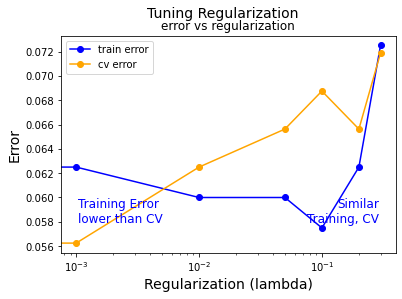

In [44]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 1ms/step


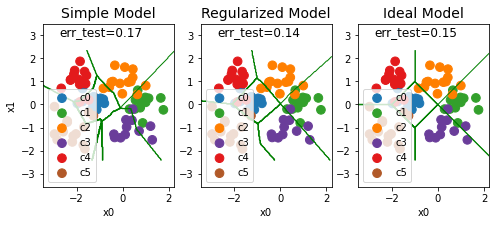

In [45]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)